# TP4 - Convergence
- $m_1$ : CLARY Emilie
- $m_2$ : CUVELIER Cyril
- $m_3$ : VAN BOXEM Rémi

##  Exercice 1

Un utilise la série : 
    $$ S_N = \sum_{n} \frac{1}{2^n} $$


##### a) En utilisant le fait que $ RN = \frac{1} {2^n} $ (n’est-ce pas ?) : quelle valeur de $N$ doit-on prendre pour commettre, en remplaçant $S$ par $ S_N $ , une erreur d’au plus $\epsilon = 10^6$ ? Évaluer cette somme partielle à l’aide d’une boucle effectuant les additions répétées.



On cherche $N$ pour que $Rn \leq 10^{-6} $, soit :

Soit $$ \frac{1}{2^n} \leq 10^{-6} $$

$$ 2^n \geq 10^6 $$

$$ n * \ln(2) \geq 6 * \ln(10) $$

Donc on a : $$ n \geq \frac{6 * \ln(10)}{ln(2)} $$

In [1]:
n = (6 * ln(10.))/ln(2.)
show(f"n = {n}")

'n = 19.9315685693242'

 Pour $ N \geq n $ (donc 19.9315685693242), on commettra une erreur inférieure à $10^6$.

On cherche ensuite à calculer la somme partielle à l'aide d'une boucle effectuant les additions répétées.

In [2]:
def sommePartielle():
    Sn = 0
    for i in [0..n]:
        Sn += 1/2^(i)
    return Sn

show(f"La suite des somme partielles est égale à {sommePartielle()}.")

'La suite des somme partielles est égale à 1.99999809265137.'

##### b) Représenter graphiquement (par exemple avec list_plot) la suite des sommes partielles jusqu’au rang trouvé en a). Commentez !

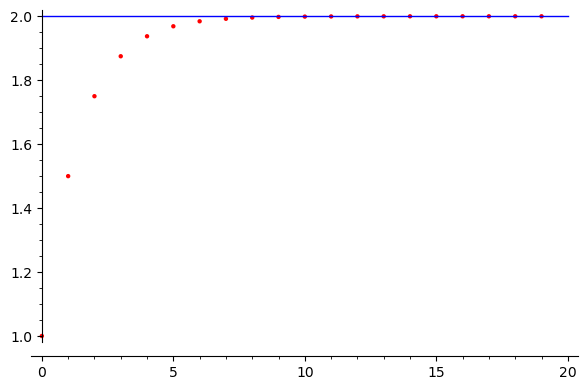

In [3]:
S = 0
spartielles = []

for k in [0..n]:
    
    S += 1/2^k
    spartielles.append(S)
    

list_plot(spartielles[:22], color='red') + plot(2, (0,20), color='blue')

On remarque immédiatemment que la suite converge rapidement vers $2$.
Nous avons une précision de $10^6$.

Le graphique de $S$ se confond à l'asymptote horizontale $y = 2$ lorsque $x$ se rapproche de $n$ (~19,931)

## Exercice 2

On peut montrer que la série alternée convergente $ S_N = \sum_{n} \frac{(-1)^n}{(2n)!} $ a pour somme $\cos(1)$.

##### a) En admettant le fait que, pour cette série, on a  $|RN| \leq \frac{1}{(2n + 2)!} $ : combien de termes doit-on prendre dans la somme pour obtenir une approximation de $\cos(1)$ valable à $\epsilon$ = 10⁻⁶ près ?

On cherche donc le nombre de termes de la somme pour une approximation de $\cos(1)$ à ε = 10⁻⁶  près.

On va calculer les sommes partielles jusqu'au rang $n$. On appelera $b$ le nombre de termes, soit $b = n + 1$.


$$ \frac{1}{(2n + 2)!} \leq 10^{-6} $$

$$ (2n + 2)! \geq 10^6 $$

Ensuite, on teste des valeurs de $n$ pour que $(2n + 2)! > 10⁶$.

In [4]:
show(f"(2*3+2)! > 10^6 ? {factorial(2*3 + 2)>10^6}")

'(2*3+2)! > 10^6 ? False'

In [5]:
show(f"(2*4+2)! > 10^6 ? {factorial(2*4 + 2)>10^6}")

'(2*4+2)! > 10^6 ? True'

On se rend compte que $n = 3$, le résultat est inférieur à $10^6$ alors que pour $n = 4$ le résultat est supérieur à $10^6$. On prend donc $n = 4$.

On rappelle que $b = n + 1$. 

Donc pour conclure, on constate qu'il faut prendre 5 termes pour obtenir une approximation de $\cos(1)$ valable à $ ε = 10^{-6} $ .

##### b) En n’utilisant que des opérations élémentaires, obtenir une telle approximation – puis comparez avec \cos(1.) pour vérifier sa validité.

On calcule donc la somme partielle $ S_n $

In [6]:
Sn = 0.
n = 4

for i in [0..n]:
    
    Sn += (-1)^(i)/(factorial(2*i))
    
show(Sn)

0.540302579365079

In [7]:
show(cos(1.))

0.540302305868140

## Exercice 3

##### a) En admettant que $ |RN| \leq \frac{1}{N+1} $ calculer une approximation de sa somme valable à $\epsilon = 10^6$ près. Reconnaissez-vous cette valeur ?

On doit trouver une approximation de sa somme valable à $\epsilon = 10^{-6}$ près.

$$ \frac{1}{n + 1} = 10^{-6} $$
$$ n + 1 = 10^6 $$

In [8]:
n = 10^6 - 1
show(n)

999999

Après avoir calculé le rang de $n$, on obtient $999999$. On va donc calculer la somme partielle associée.

In [9]:
%%time

Sn = 0.

for i in [1..n]:
    
    Sn += ((-1)^(i+1))/i
    
show(Sn)

0.693147680560253

CPU times: user 3.8 s, sys: 123 ms, total: 3.92 s
Wall time: 3.93 s


In [10]:
show(exp(Sn))

2.00000100000086

In [11]:
show(ln(2.))

0.693147180559945

On remarque que la valeur trouvée est quasiment similaire à $\ln(2.)$, 

###### b) D’après vous, combien de temps serait nécessaire avec cette méthode pour la calculer à une précision $\epsilon = 10^{−12} $ ? (%%time en début de cellule permet d’afficher le temps d’exécution de celle-ci) Comparez avec la série de la question précédente.

Nous nous attendions à un temps très long, de l'ordre d'une quinzaine de secondes pour calculer cette précision.

Nous pensions qu'il fallait une dizaine de secondes pour calculer une précision de 10¹² près. Après comparaison, nous avons compris qu'il faut un labs de temps beaucoup plus important. Pour une erreur $e = 10^{-6}$, l'ordinateur fait 999 999 ($10^{-6} - 1$) iterations en un peu moins de 2 secondes. Si l'erreur est de $e = 10^{-12}$, nous aurions alors 999 999 999 999 iterations... ce qui se calculerait en environ 2 000 000 secondes.


## Exercice 4
La *fonction zêta de Riemann* est la fonction qui associe à chaque $\alpha > 1$ la somme $\zeta(\alpha)$ de la série convergente $$\sum_{n\in\mathbb{N}}\frac{1}{n^\alpha}$$.

### Question a
En comparant le reste de la série à l’aire sous $y = \frac[1}{x^{\alpha}}$ à partir d’une certaine abscisse, établir l’inégalité $$|\zeta(a)-\sum_{n=1}^N \frac{1}{n^\alpha}| \leq \frac{1}{\alpha - 1} \times \frac{1}{N^{\alpha -1}}$$. En déduire le nombre $N$ de termes nécessaires pour obtenir une estimation de $\zeta(\alpha)$ à une précision $\epsilon$ donnée

![Exercice 4](ex4-a.jpg)

### Question b
Donner une estimation numérique de $\zeta(2+\frac{m}{12})$, où $m$ est le numéro de votre mois de naissance.

In [12]:
# Date d'anniversaire Émilie
em, emt = 3, "Émilie\n"
# Date d'anniversaire Rémi
re, ret = 6, "Rémi\n"
# Date d'anniversaire Cyril
cy, cyt = 8, "Cyril\n"
def zetaa(alpha, N):
    somme = 0
    for i in range(1,N):
        somme += 1/i^alpha
    return somme

text = "Précision de l'anniversaire de "
it = 1000
show(text,emt,N(zetaa(2+em/12,it)))
show(text,cyt,N(zetaa(2+cy/12,it)))
show(text,ret,N(zetaa(2+re/12,it)))

"Précision de l'anniversaire de " 'Émilie\n' 1.46006951485853

"Précision de l'anniversaire de " 'Cyril\n' 1.28418453523752

"Précision de l'anniversaire de " 'Rémi\n' 1.34146615958187

### Question c
*Sauriez-vous conjecturer une formule pour la valeur exacte de $\zeta(2n)$, $n\in \mathbb{N}^*$.*

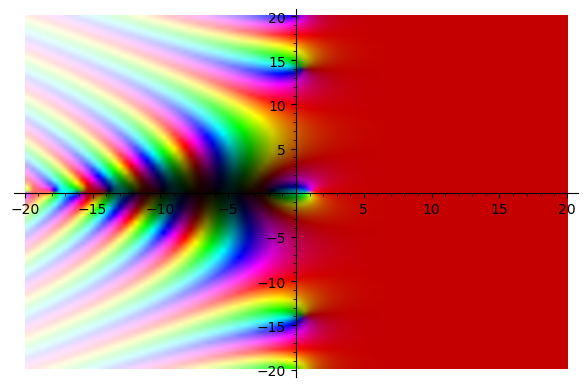

In [15]:
complex_plot(zeta, (-20,20), (-20,20))